### 1. Load the data
#### loading the data into a Pandas DataFrame

In [33]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

stock_data = pd.read_csv(r"C:\Users\heaven.ether\Desktop\BCA_DS\SEM 3_GDW\projects\People_Project_S3\Anna\Robinson_Stock_Prices.csv")
stock_data.head()

,symbol,date,open,high,low,close,volume
0,AAL,02-01-2014,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,02-01-2014,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,02-01-2014,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,02-01-2014,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,02-01-2014,70.1100,70.2300,69.4800,69.8900,1148391


In [34]:
stock_data.shape

(497472, 7)

### 2. Prepare the data
#### Changing the dates into datetime format to utilize time-series functionalities in Pandas.

In [41]:
# Convert the date column to datetime
stock_data['date'] = pd.to_datetime(stock_data['date'], format='%d-%m-%Y')
stock_data['date'].sample(10)

342758   2016-10-10
445859   2017-08-04
151122   2015-03-27
6850     2014-01-23
232289   2015-11-20
49479    2014-05-30
315992   2016-07-25
464678   2017-09-27
486589   2017-11-29
78818    2014-08-25
Name: date, dtype: datetime64[ns]

### Checking for missing values
#### A Check for and fill or remove missing values to prepare the dataset for analysis.

In [5]:
# Check for missing values
print(stock_data.isnull().sum())

symbol    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64


### Basic Statistics
#### Compute some basic statistical measures to understand the distribution of the stock prices.

In [6]:
# Descriptive statistics
print(stock_data.describe())

                                date           open           high  \
count                         497472  497472.000000  497472.000000   
mean   2016-01-06 17:16:00.439984896      86.351835      87.131986   
min              2014-01-02 00:00:00       1.620000       1.690000   
25%              2015-01-08 00:00:00      41.690000      42.090000   
50%              2016-01-11 00:00:00      64.970000      65.560000   
75%              2017-01-06 00:00:00      98.410000      99.230000   
max              2017-12-29 00:00:00    2044.000000    2067.990000   
std                              NaN     101.470449     102.311361   

                 low          close        volume  
count  497472.000000  497472.000000  4.974720e+05  
mean       85.551898      86.369082  4.253611e+06  
min         1.500000       1.590000  0.000000e+00  
25%        41.280000      41.703750  1.080166e+06  
50%        64.350000      64.980000  2.084896e+06  
75%        97.580000      98.420000  4.271928e+06  
max  

In [42]:
# Calculate daily returns
stock_data['daily_return'] = stock_data['close'].pct_change()
stock_data['daily_return']

0              NaN
1         2.115871
2         0.388789
3        -0.526335
4         0.344556
            ...   
497467    1.339623
497468    0.196628
497469    0.478618
497470   -0.578769
497471    0.417273
Name: daily_return, Length: 497472, dtype: float64

### 4. Rolling Statistics (Moving Averages)
#### Calculate moving averages to identify trends.

In [45]:
# Calculate the 7-day moving average of the closing prices
stock_data['7_day_MA'] = stock_data['close'].rolling(window=7).mean()

# Calculate the 30-day moving average
stock_data['30_day_MA'] = stock_data['close'].rolling(window=30).mean()

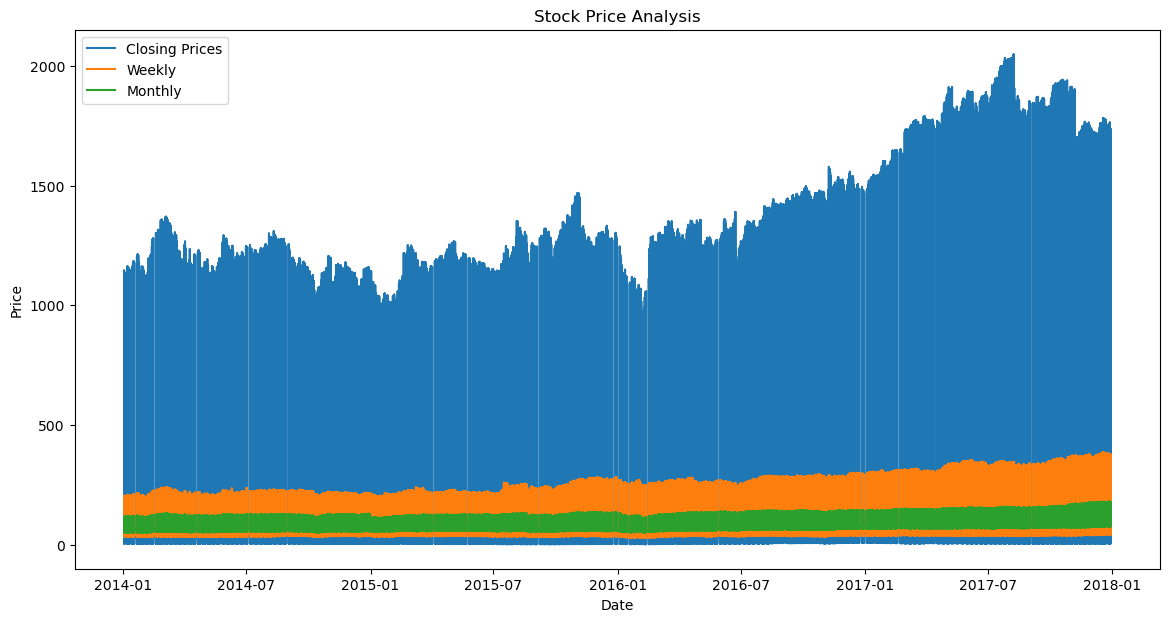

In [50]:
import matplotlib.pyplot as plt

# Plot closing price and moving averages
plt.figure(figsize=(14, 7))
plt.plot(stock_data['date'], stock_data['close'], label='Closing Prices')
plt.plot(stock_data['date'], stock_data['7_day_MA'], label='Weekly')
plt.plot(stock_data['date'], stock_data['30_day_MA'], label='Monthly')
plt.title('Stock Price Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [18]:
# Calculate volatility as the standard deviation of daily returns
stock_data['volatility'] = stock_data['daily_return'].rolling(window=30).std() * (252**0.5)  # Annualize the volatility

In [19]:
# Identify days with the highest and lowest closing prices
highest_closing = stock_data.loc[stock_data['close'] == stock_data['close'].max()]
lowest_closing = stock_data.loc[stock_data['close'] == stock_data['close'].min()]

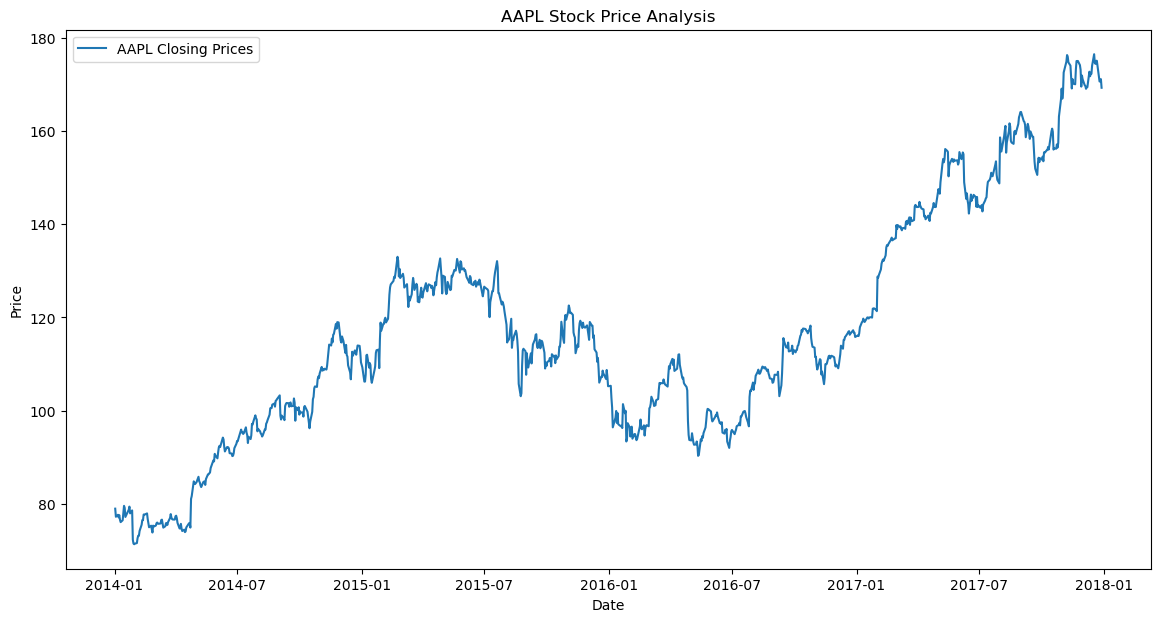

In [20]:
# Analyzing a specific stock, e.g., AAPL
aapl_data = stock_data[stock_data['symbol'] == 'AAPL']

# Plot AAPL data
plt.figure(figsize=(14, 7))
plt.plot(aapl_data['date'], aapl_data['close'], label='AAPL Closing Prices')
plt.title('AAPL Stock Price Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Additional Analysis

#### 1. Open, High, and Low Prices

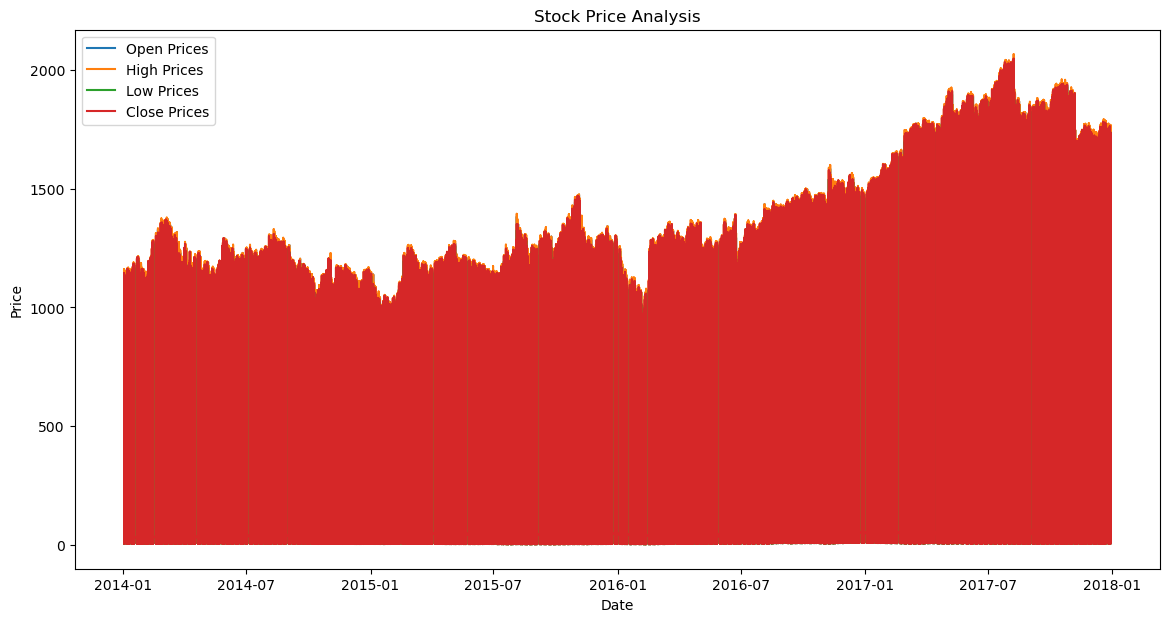

In [24]:
# Plotting Open, High, Low, and Close Prices
plt.figure(figsize=(14, 7))
plt.plot(stock_data['date'], stock_data['open'], label='Open Prices')
plt.plot(stock_data['date'], stock_data['high'], label='High Prices')
plt.plot(stock_data['date'], stock_data['low'], label='Low Prices')
plt.plot(stock_data['date'], stock_data['close'], label='Close Prices')
plt.title('Stock Price Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### 2. Volume

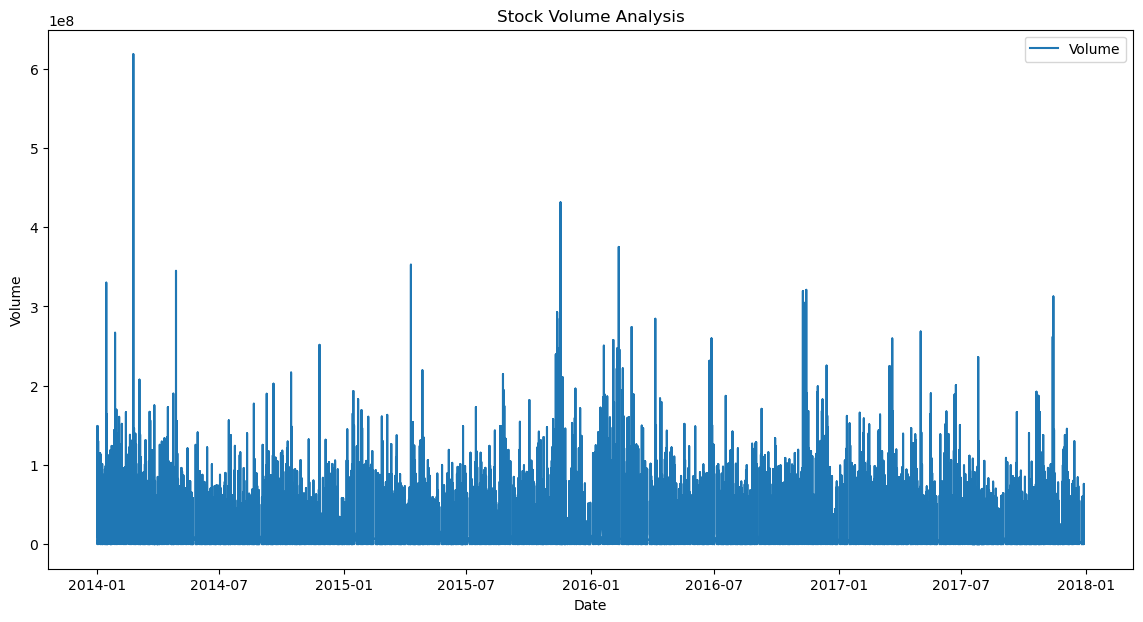

In [25]:
# Plotting Volume
plt.figure(figsize=(14, 7))
plt.plot(stock_data['date'], stock_data['volume'], label='Volume')
plt.title('Stock Volume Analysis')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

### 3. Daily Returns

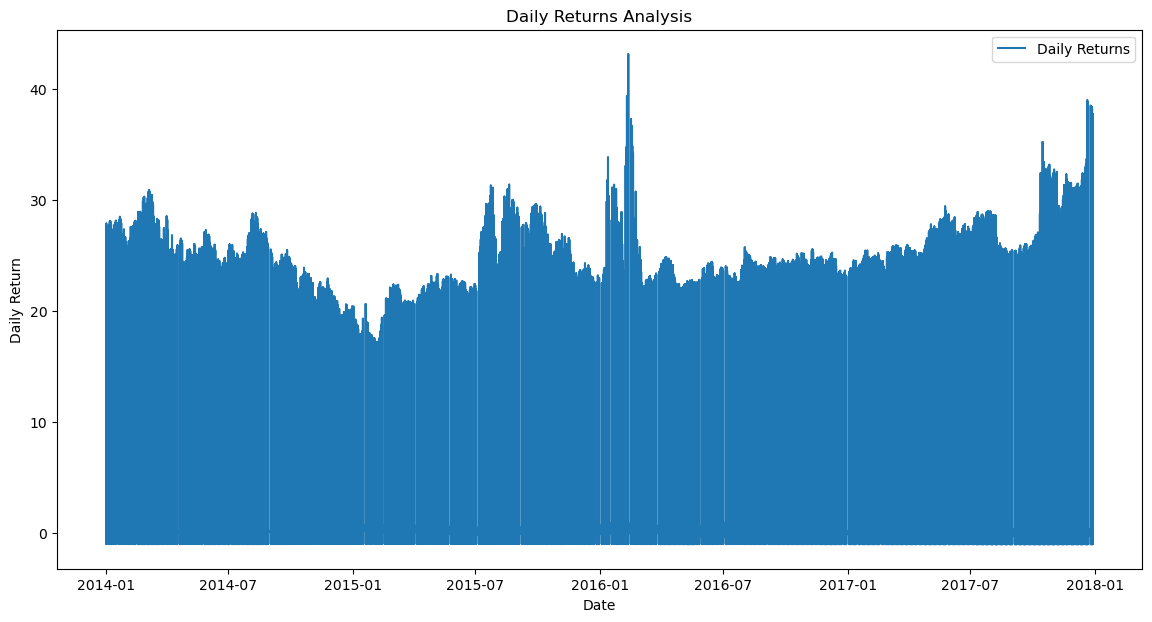

In [27]:
# Calculate daily returns
stock_data['daily_return'] = stock_data['close'].pct_change()

# Plotting Daily Returns
plt.figure(figsize=(14, 7))
plt.plot(stock_data['date'], stock_data['daily_return'], label='Daily Returns')
plt.title('Daily Returns Analysis')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

### 4. Volatility

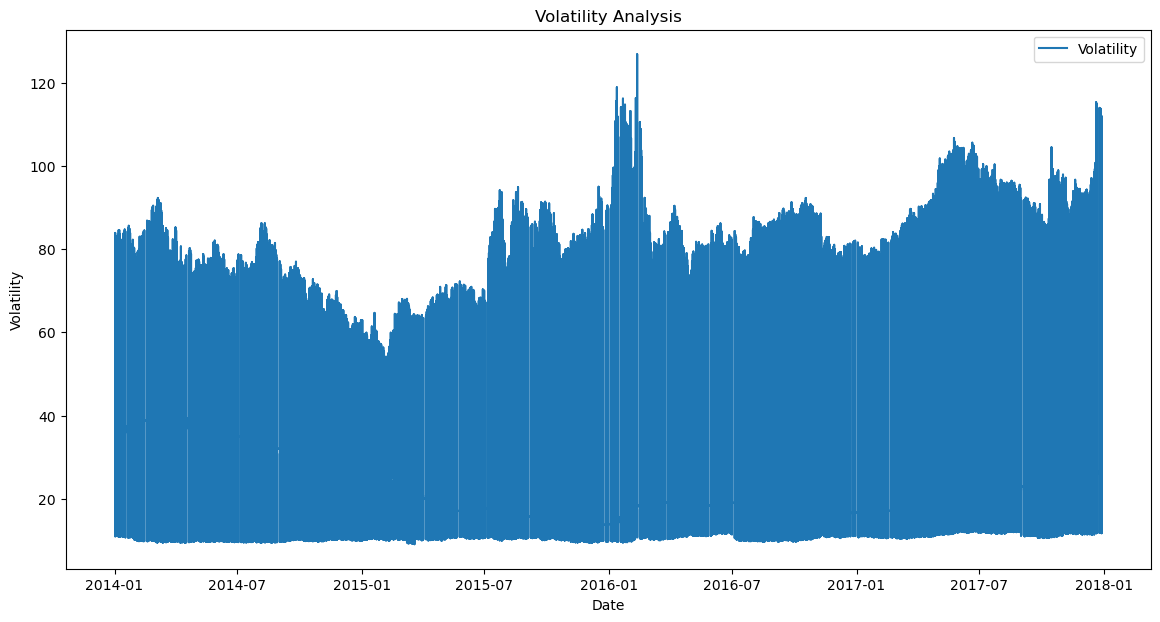

In [28]:
# Calculate volatility
stock_data['volatility'] = stock_data['daily_return'].rolling(window=30).std() * (252**0.5)  # Annualize the volatility

# Plotting Volatility
plt.figure(figsize=(14, 7))
plt.plot(stock_data['date'], stock_data['volatility'], label='Volatility')
plt.title('Volatility Analysis')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()